My first Ml project and start journey of ml

In [32]:
import matplotlib 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from numpy import genfromtxt


In [33]:
def MeanSquareError(m,b,pt):
    error=0.0
    for i in range(len(pt)):
        y=pt[i,1]
        x=m*pt[i,0]+b
        error+=(y-x)**2
    return error/float(len(pt))


In [34]:
def gradient(bValue,mValue,learning,pt):
    bGrad=0
    mGrad=0
    n=len(pt)
    for i in range(len(pt)):
        y=pt[i,1]
        bGrad+=-(2/n)*(y-(mValue*pt[i,0]+bValue))
        mGrad+=-(2/n)*(pt[i,0])*(y-(mValue*pt[i,0]+bValue))
    bValue-=bGrad*learning
    mValue-=mGrad*learning
    return (bValue,mValue)

In [35]:
def Compute(pt,bInitial,mInitial,learning,iteration):
    bUpdate=bInitial
    mUpdate=mInitial
    for i in range(iteration):
        bUpdate,mUpdate=gradient(bUpdate,mUpdate,learning,pt)
    return bUpdate,mUpdate

In [36]:
def run(n,learningRate):
    pt=genfromtxt("data.csv", delimiter=",")
    b=0
    m=0
    iteration=n
    b,m=Compute(np.array(pt),b,m,learningRate,iteration)
    return b,m

In [37]:
def plotData():
    pt=genfromtxt("data.csv", delimiter=",")
    x=[]
    y=[]
    b,m=run(1000,0.0001)
    for i in range(len(pt)):
        x.append(pt[i,0])
        y.append(pt[i,1])
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=m*x1+b
    plt.scatter(x, y, alpha=0.5)
    plt.plot(x1,y1,'ob')
    plt.title('Linear regression')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    return (b,m)

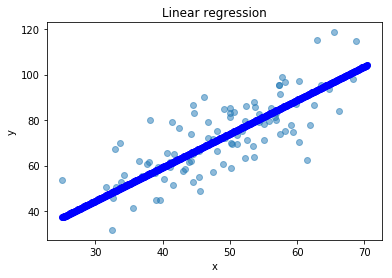

the mean square error is 112.61481011613473


In [39]:
b,m=plotData()
pt=genfromtxt("data.csv", delimiter=",")
print("the mean square error is",MeanSquareError(m,b,pt))